In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head

<bound method NDFrame.head of               Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0              0       24        0        0       5       247.30      2   
1              1   440875        1        1       0        37.65      1   
2              2   878242        2        0       1        93.73      1   
3              3  1319841        3        0       0        95.88      0   
4              4  1757883        4        0       1         0.00      0   
5              5  2200824        5        0       2       128.10      0   
6              6  2568717        6        1       0       130.30      0   
7              7  2612473        7        1       1       661.80      2   
8              8  2656377        8        0       3        94.72      0   
9              9  2700597        9        0       0       137.60      0   
10            10    45059       10        0       1       166.00      0   
11            11    89377       11        0       0       219.10      

In [4]:
train.shape

(4357336, 26)

In [5]:
cols = [i for i in train]
print (cols)

['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']


In [6]:
def relation(name):
    fig = plt.figure(figsize = (10, 10))
    plt.scatter(train[name], train['winPlacePerc'])
    plt.show()

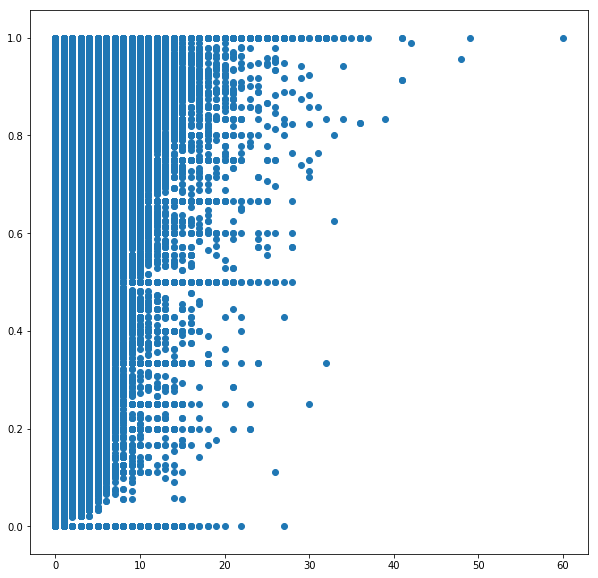

In [7]:
#plotting relation between 'kills' and 'winPlacePerc'

relation('kills')

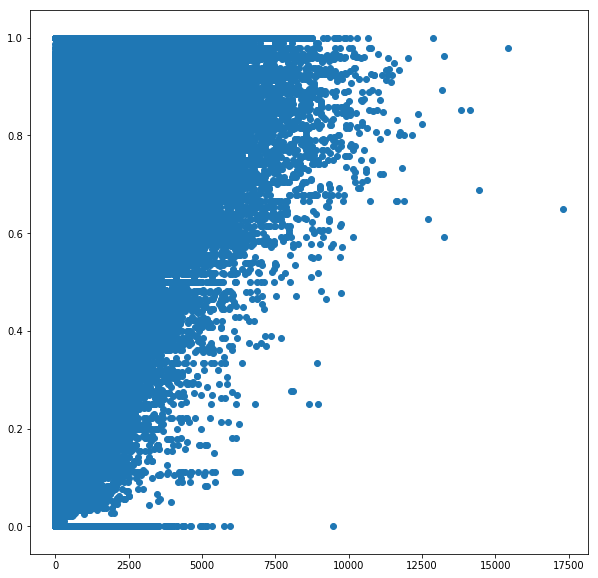

In [8]:
#plotting relation between 'walkDistance' and 'winPlacePerc'

relation('walkDistance')

In [9]:
train.drop(['Id', 'matchId', 'groupId'], axis = 1)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,5,247.30,2,0,4,17,1050,2,1,...,1,591.3,0,0.0000,0,0,782.400,4,1458,0.8571
1,1,0,37.65,1,1,0,45,1072,1,1,...,0,0.0,0,0.0000,0,0,119.600,3,1511,0.0400
2,0,1,93.73,1,0,2,54,1404,0,0,...,1,0.0,0,0.0000,0,0,3248.000,5,1583,0.7407
3,0,0,95.88,0,0,0,86,1069,0,0,...,0,0.0,0,0.0000,0,0,21.490,1,1489,0.1146
4,0,1,0.00,0,0,1,58,1034,0,0,...,0,0.0,0,0.0000,0,0,640.800,4,1475,0.5217
5,0,2,128.10,0,0,0,25,1000,1,1,...,0,2221.0,0,0.0000,0,0,1016.000,4,1500,0.9368
6,1,0,130.30,0,0,0,28,1037,1,1,...,0,721.7,0,0.0000,0,0,280.100,3,1495,0.3721
7,1,1,661.80,2,3,2,3,1148,5,2,...,0,0.0,0,0.0000,0,0,2617.000,4,1479,1.0000
8,0,3,94.72,0,0,5,50,1286,0,0,...,0,2963.0,0,28.9000,0,0,3139.000,5,1528,0.7037
9,0,0,137.60,0,0,0,81,1000,0,0,...,0,0.0,0,0.0000,0,0,238.700,3,1500,0.0417


In [10]:
Y = np.array(train['winPlacePerc'])
X = np.array(train.drop(['winPlacePerc'], axis = 1))

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [16]:
linreg = LinearRegression(normalize = False, fit_intercept = True, copy_X = True)

ridge = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True,
              max_iter=None, tol=0.001, random_state=None)

lasso = Lasso(alpha=1.0, fit_intercept=True, normalize=False, 
              precompute=False, copy_X=True, max_iter=1000, 
              tol=0.0001, warm_start=False, positive=False, random_state=None)

elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, 
                        precompute=False, max_iter=1000, copy_X=True, tol=0.0001, 
                        warm_start=False, positive=False, random_state=None)


models = [linreg, ridge, lasso, elasticnet]
names = ['LinearReg', 'Ridge', 'Lasso', 'ElasticNet']
total_models = len(models)

In [17]:
def trainModel(model, model_name):
    print ('Training Started...')
    model.fit(X_train, Y_train)

    acc = model.score(X_test, Y_test)

    print ("Accuracy of the {model_name} model = {acc:.4f}".format(model_name = model_name
                                                               ,acc = acc * 100))

In [18]:
for i in range(total_models):
    trainModel(models[i], names[i])

Training Started...
Accuracy of the LinearReg model = 80.6933
Training Started...
Accuracy of the Ridge model = 80.6933
Training Started...
Accuracy of the Lasso model = 72.1573
Training Started...
Accuracy of the ElasticNet model = 74.4008


In [19]:
Ids = test['Id']
test.drop(['Id', 'matchId', 'groupId'], axis = 1)

x = np.array(test)
submission = [['Id', 'winPlacePerc']]

In [20]:
best_model = linreg

for i, j in zip(x, Ids):
    input_array = i.reshape(1, -1)
    prediction = best_model.predict(input_array)[0]
    submission.append([j, prediction])

In [21]:
# submission.to_csv('submission1.csv', index = False)
# pd.DataFrame(submission).to_csv('submission1.csv', index = False)

In [22]:
s = pd.DataFrame(submission)
s.head()

,0,1
0,Id,winPlacePerc
1,47734,0.353271
2,47735,0.501418
3,47736,0.170526
4,47737,0.289296
